In [728]:
#########################################################################################
#    Filename : Proj_Resonance_Lorentzian_GitHub_Run_Me.ipynb
#    Date : Aug 28, 2015
#    What : Runs the main file, which is def_resonance_tangent_for_github.py
#           You must give it four parameters
#
#########################################################################################
import scipy
import numpy as np
from scipy.stats import mode
import def_resonance_tangent_for_github as drl
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize']=(18,6)

''' Tell me the file which you wanna look at'''
dset = np.load('/Users/TzeGoh/Desktop/2015-07-17-resonance-search.npz')
dset.keys()
print "Keys:",dset.keys()                  

Keys: ['fr', 's21c']


In [729]:
''' This cell tells you the main variables --> x-axis(freq) and y-axis (data)'''

input_x = raw_input ("What is the frequency ? usually 'freq', don't put parathensis: ")
input_y = raw_input ("What is the data ? usually 'data', do not put parathensis: ")
freq = dset[input_x] 
raw_data = dset[input_y]
data = raw_data.copy()

min_list = drl.give_me_possible_seperation_of_minima(data)
sep_and_repeat_list = drl.give_me_seperation_and_repitition(min_list)
cancelling_list = drl.give_me_starting_number_and_seperation(min_list,sep_and_repeat_list)

for i in range(len(cancelling_list)):
    start = cancelling_list[i][0]
    repeat = cancelling_list[i][1]
    data[start::repeat] = np.nan

freq = freq[np.isfinite(data)]  
data = data[np.isfinite(data)]  
print 'Length of data:', len(data)

Length of data: 12670


In [730]:
'''You just have to toggle these 8 values : These 8 parameters define the search for minimums'''
flat = 3                                # flat is the gradient of the points around centre
move = 0                                # move is the number of points around the centre
noise = 3                               # noise is how many points away from 'move'
tol = 1                                 # tolerance determine spread of tangent function to the left
tol2 = 1                                # tolerance determine spread of tangent function to the right

grad_threshold_4_res = 8                # less than this absolute amount, and it is just noise
noise_depth = 0.17                      # this is the depth of the "line" ie how much noise there is
random_spread = 6*noise                 # how far out along horizontal axis that you want to check for random noise

In [731]:
''' This cell fixes x and y for the rest of the programme, as well as where to look for the minimums  '''
a = freq 
b = data
x = a
y = 20 * np.log10(np.abs(b))
locmins,order_of_mins = drl.resonators(flat, move, noise, tol, x, y, grad_threshold_4_res,\
                                       noise_depth, random_spread)

ranges_to_look, freq_to_look, data_to_look = drl.where_do_i_look(locmins, x, y)   
xstart, xend, ystart, yend = drl.box_in_the_plot(ranges_to_look, freq_to_look, \
                                                 data_to_look)

length of data 12670
There are 15 resonators, and they occur at ...'
Resonator 	Frequency 	data numbers
1 		93.986328125 	-42.7162650507
2 		101.814453125 	-43.4310720712
3 		104.642578125 	-43.7362098715
4 		110.798828125 	-44.0127021136
5 		113.298828125 	-43.0952692485
6 		127.126953125 	-44.1410764211
7 		133.158203125 	-43.5961672148
8 		136.408203125 	-44.0236139851
9 		145.548828125 	-44.3327029657
10 		162.080078125 	-45.7471985784
11 		162.548828125 	-45.1303306807
12 		163.814453125 	-45.1359595179
13 		176.814453125 	-46.3440947663
14 		182.720703125 	-47.460515564
15 		186.220703125 	-48.410153852


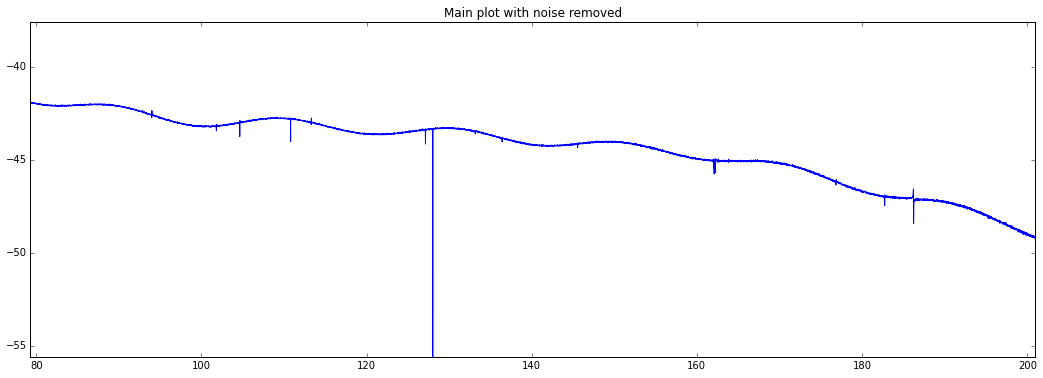

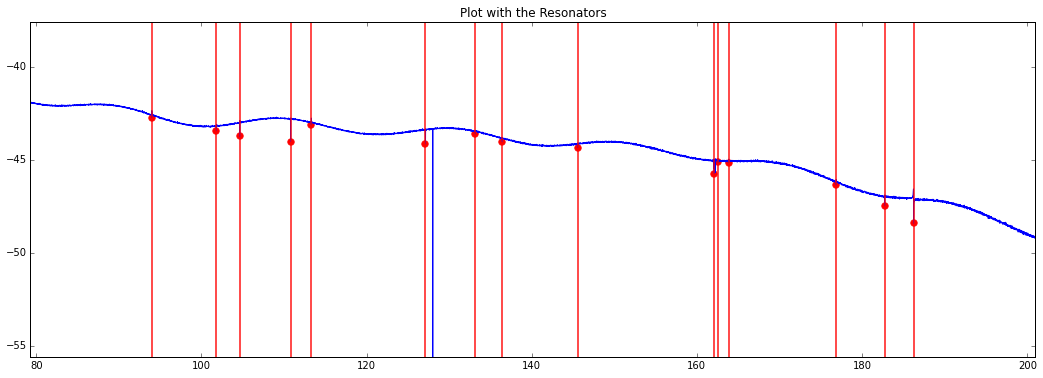

In [732]:
'''This shows you the main plot'''
drl.main_plot_with_noise(x, y, xstart, xend, ystart, yend)
plt.figure()

'''This shows you where the resonators are, and prints out those points for you'''
drl.show_me_resonators(order_of_mins, data, x, y, xstart, xend, ystart, yend)
plt.figure()


Enter : 1)See Resonance close up 2)See Resonance close-up w/ Tangent only ( This is usually enough ) 3)See Resonance close-up, and then see Resonance close-up with Tangent 3
The number of fits with Chi_square more than 100 is 0
The number of fits with Chi_square less than 1 is 14
Resonator 	Chi_square 	at these Frequencies
1 		0.0824224437222 	93.986328125
2 		0.0136012071211 	101.814453125
3 		0.512714801203 	104.642578125
4 		0.00403382163817 	110.798828125
5 		0.0684314439915 	113.298828125
6 		0.52028511855 	127.126953125
7 		0.0176758827166 	133.158203125
8 		0.0416139363649 	136.408203125
9 		0.00364987045681 	145.548828125
10 		0.190560292357 	162.080078125
11 		0.00359469678325 	162.548828125
12 		0.0045386313562 	163.814453125
13 		0.02867219729 	176.814453125
14 		0.228237357291 	182.720703125
15 		2.53595621889 	186.220703125


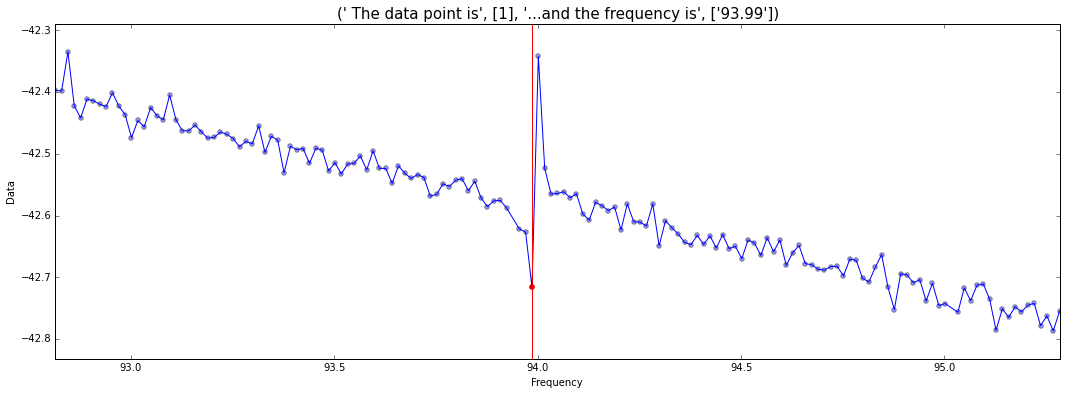

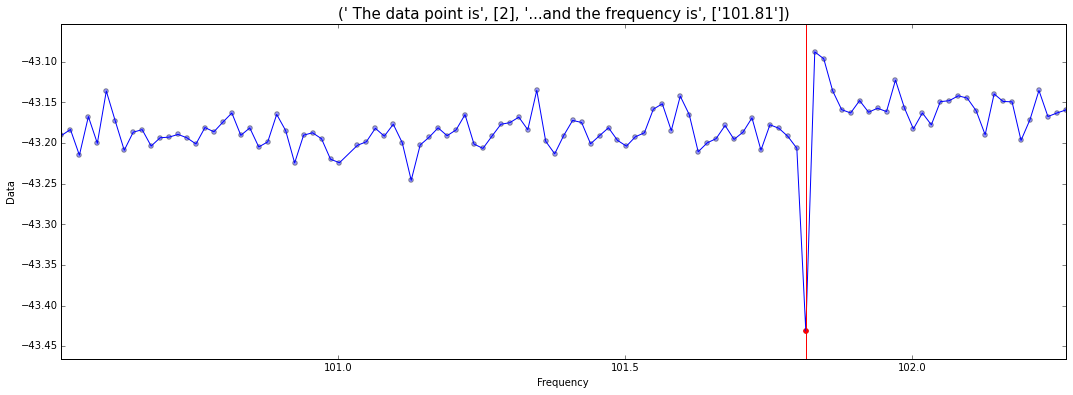

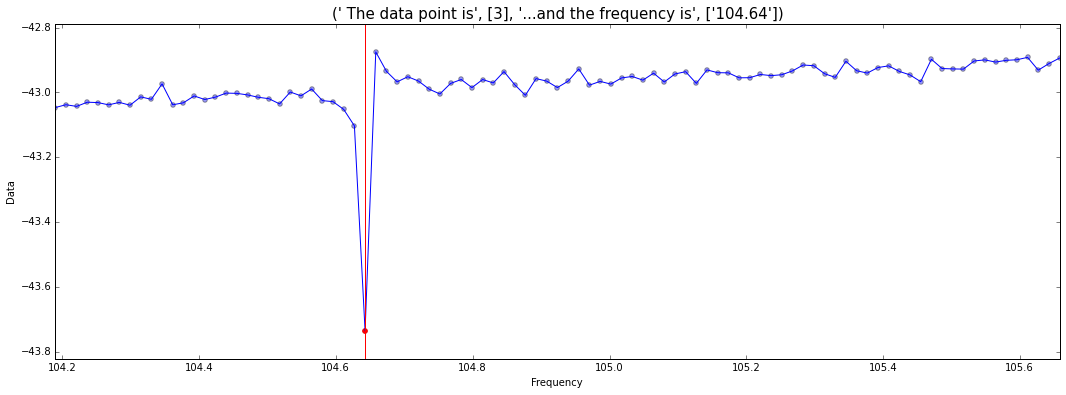

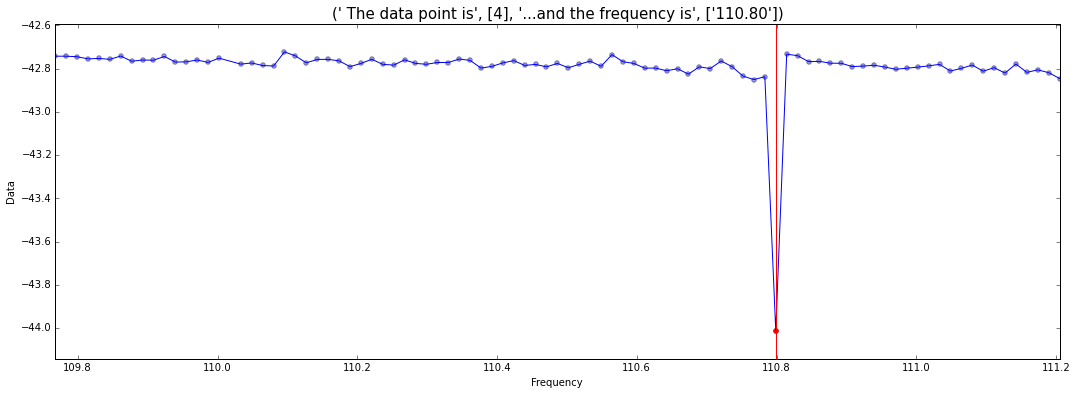

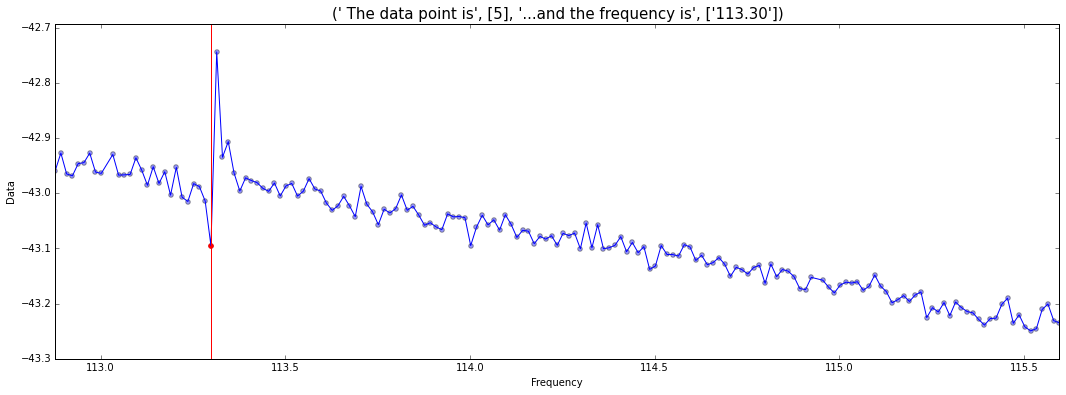

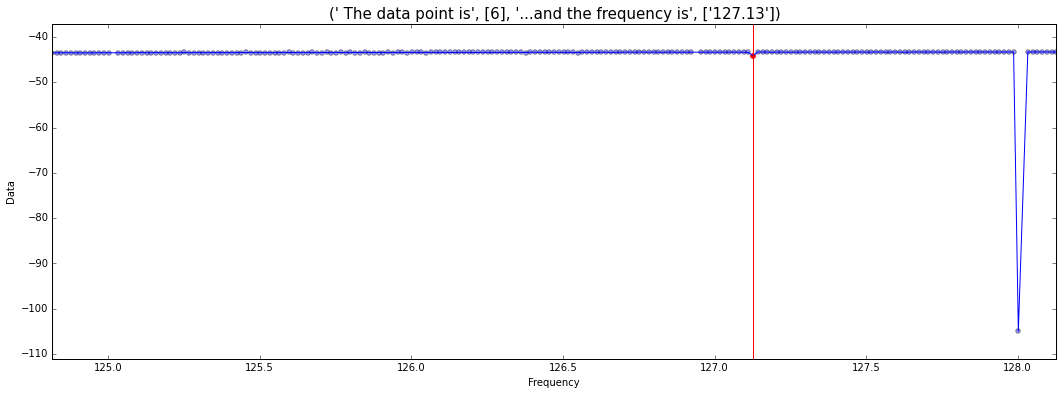

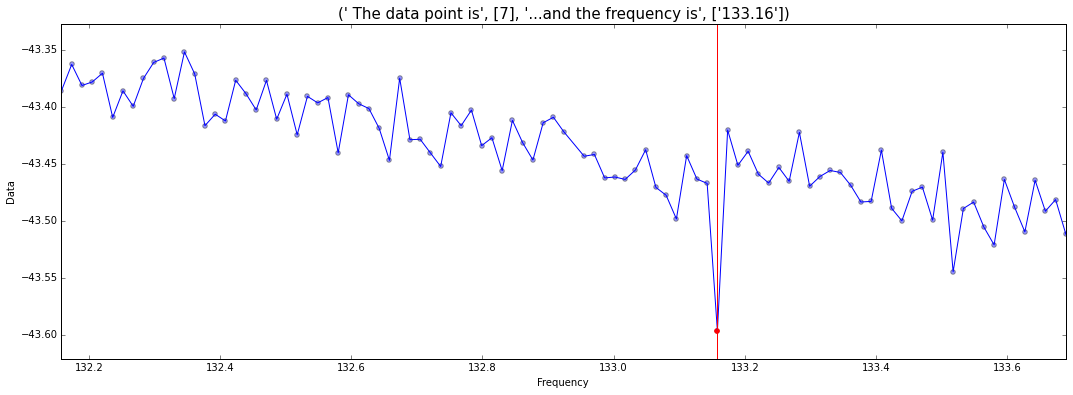

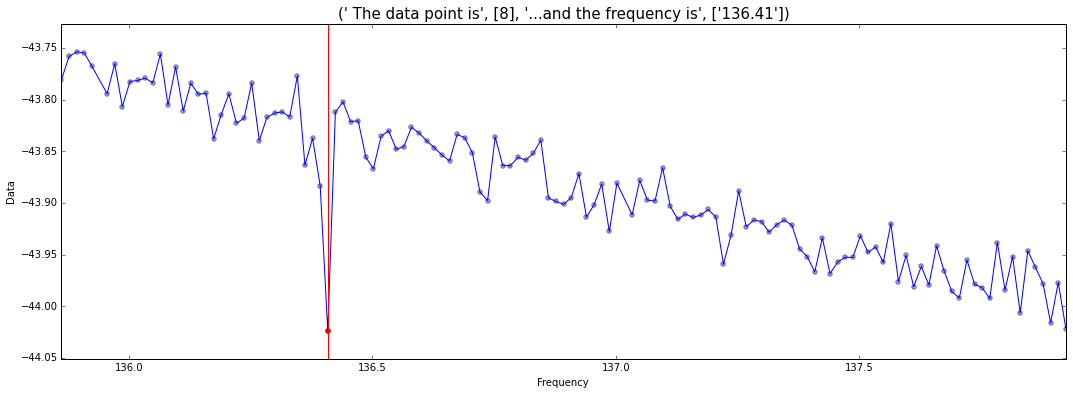

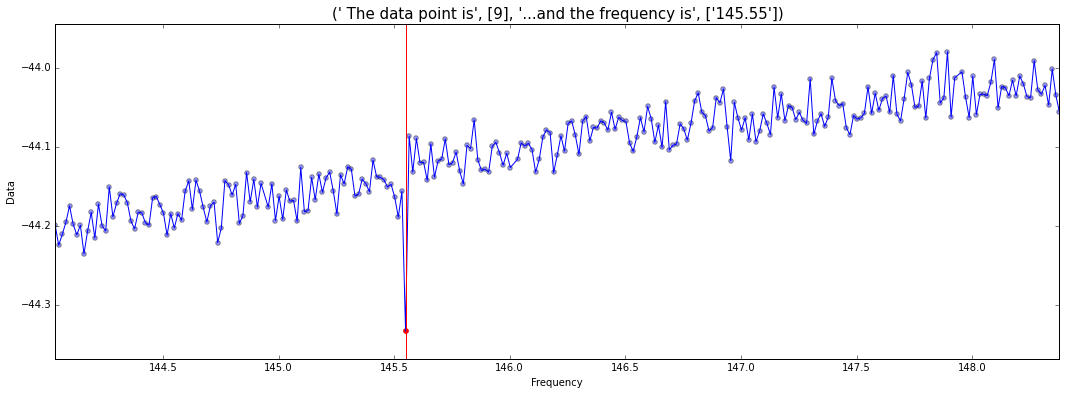

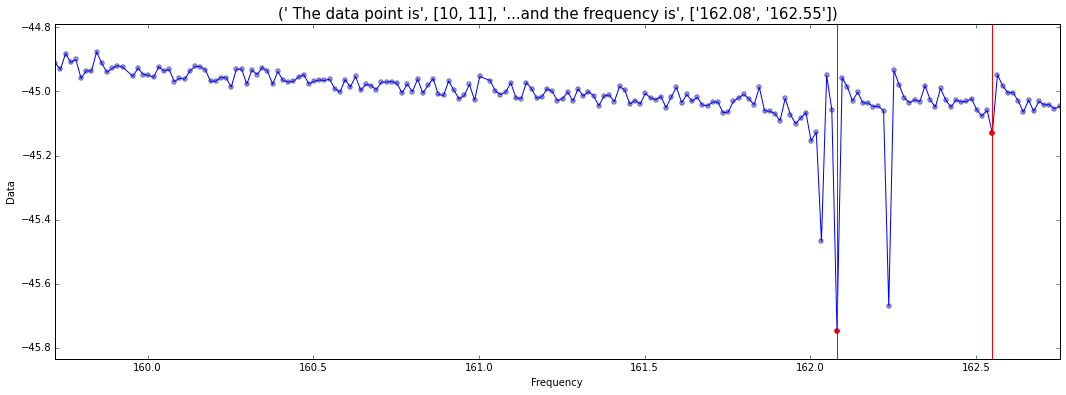

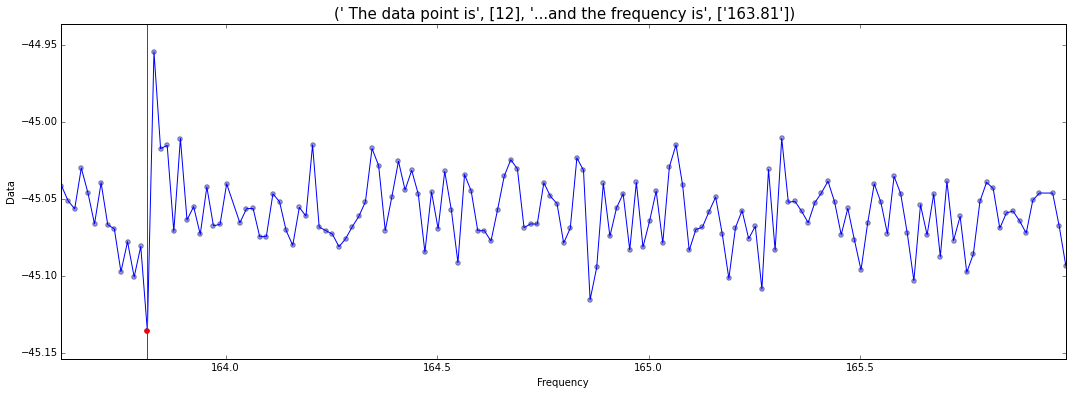

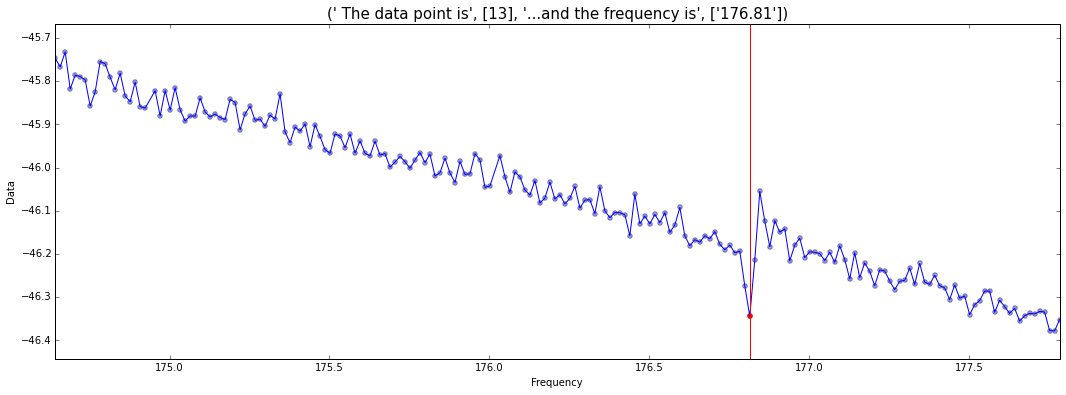

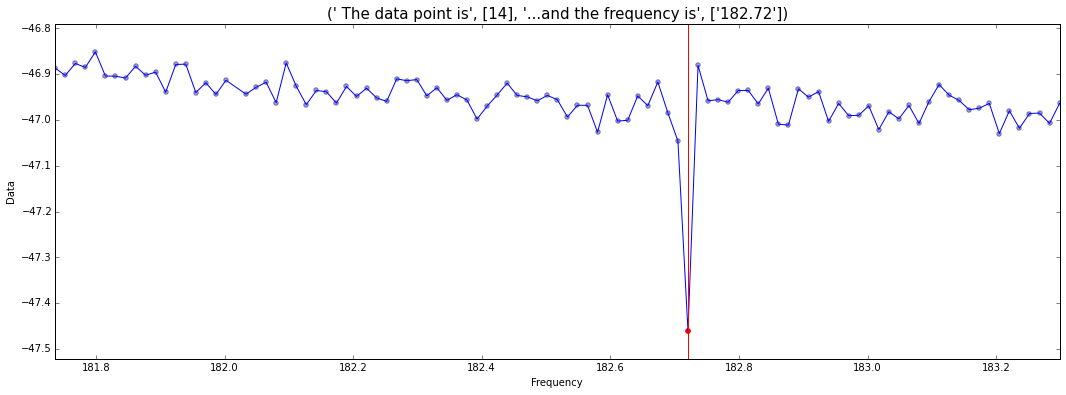

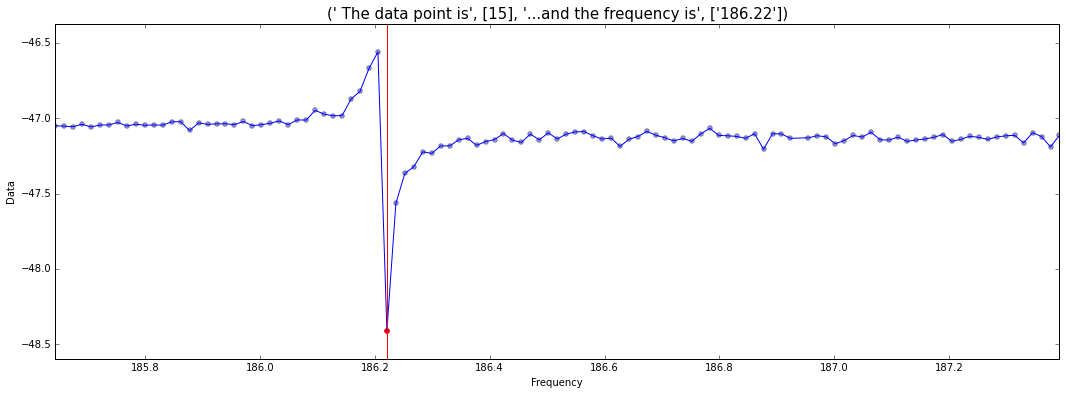

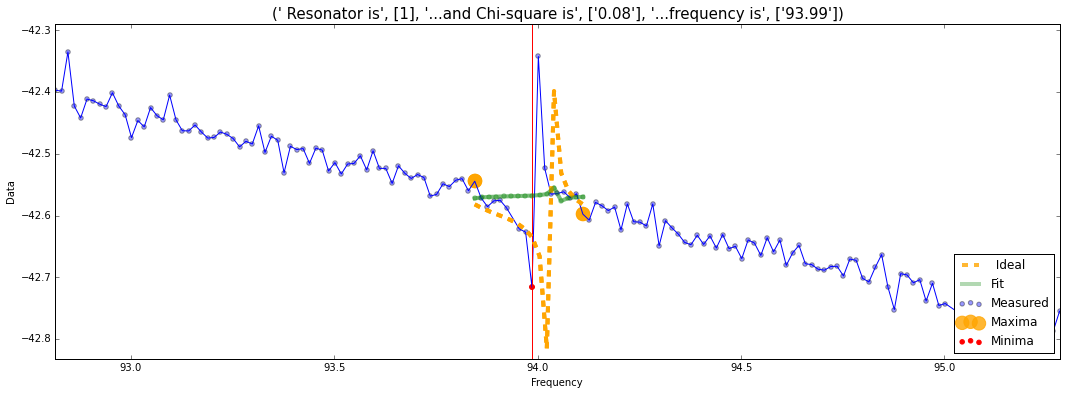

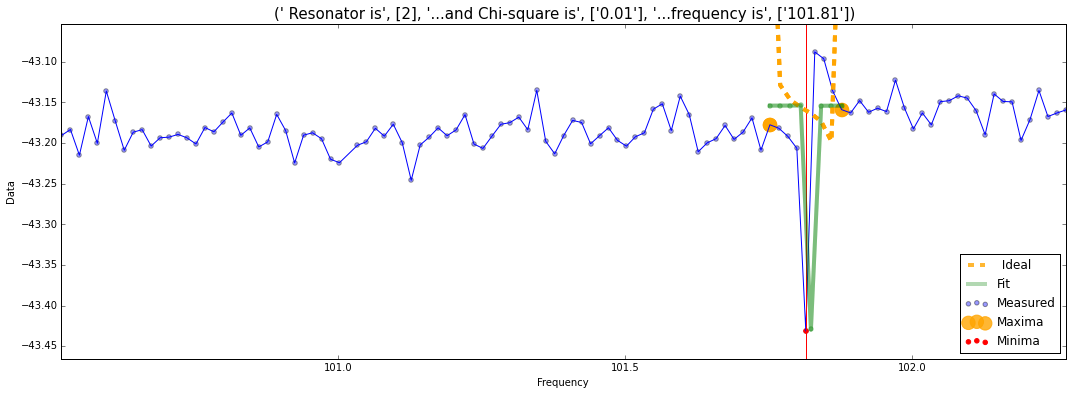

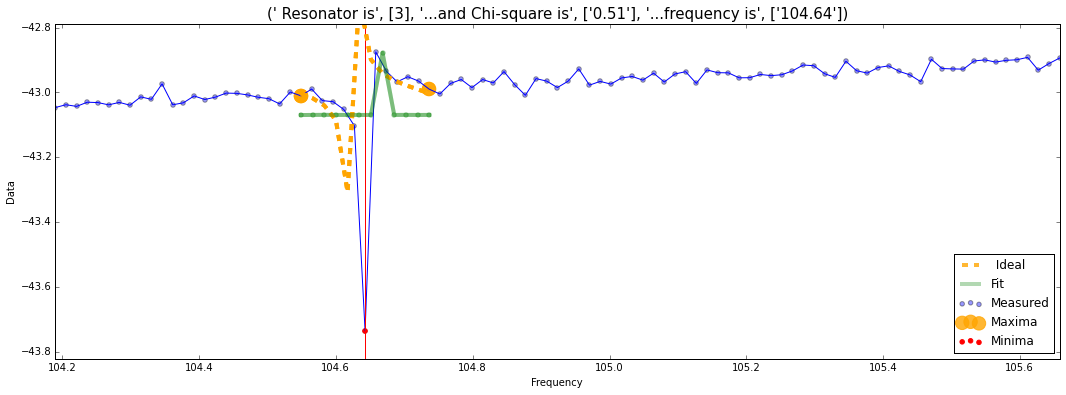

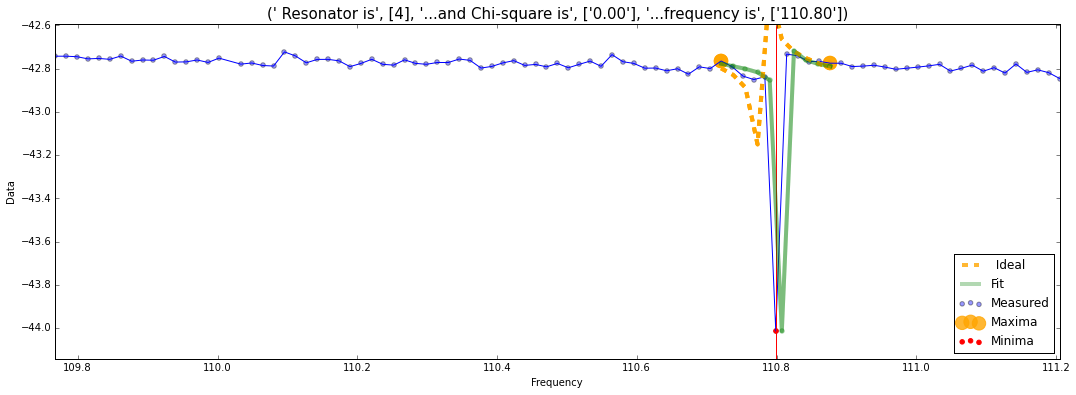

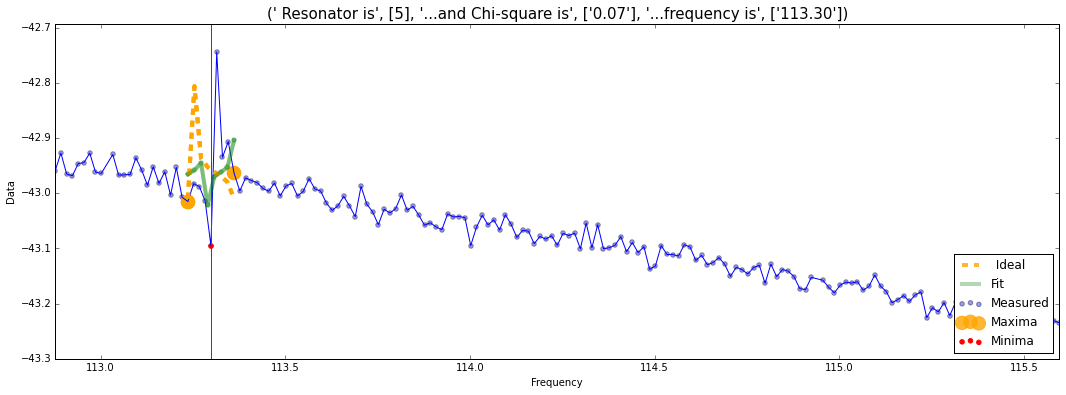

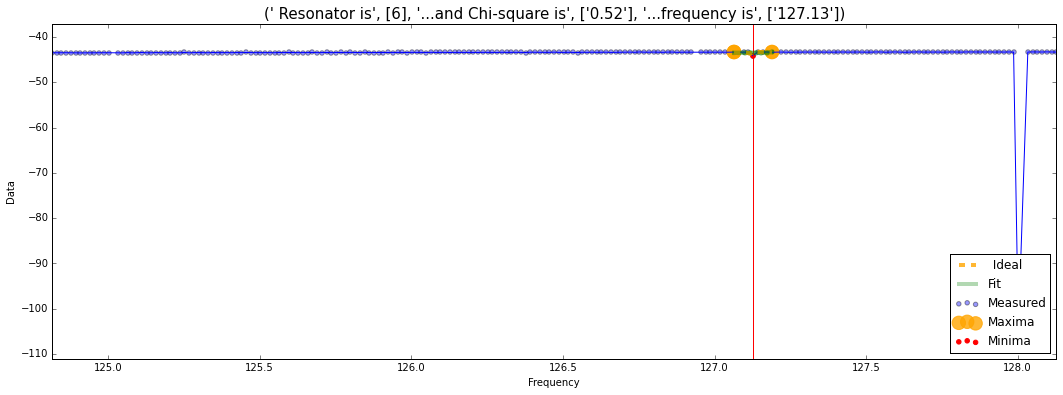

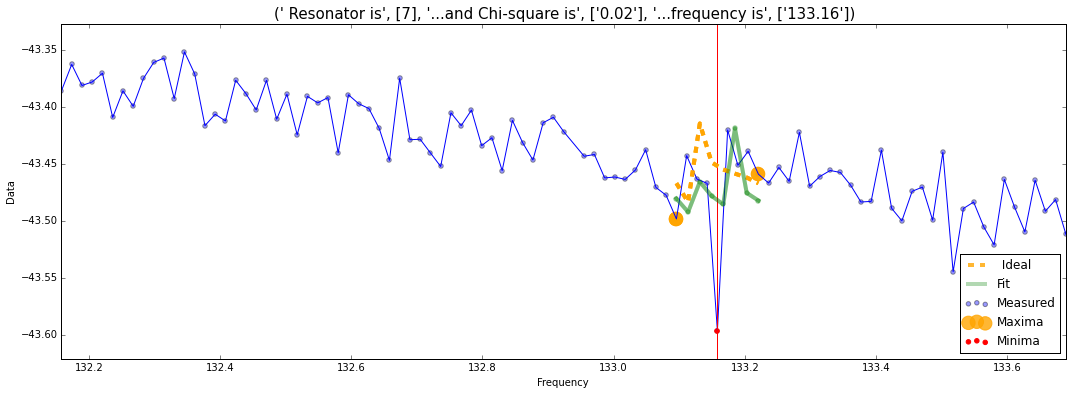

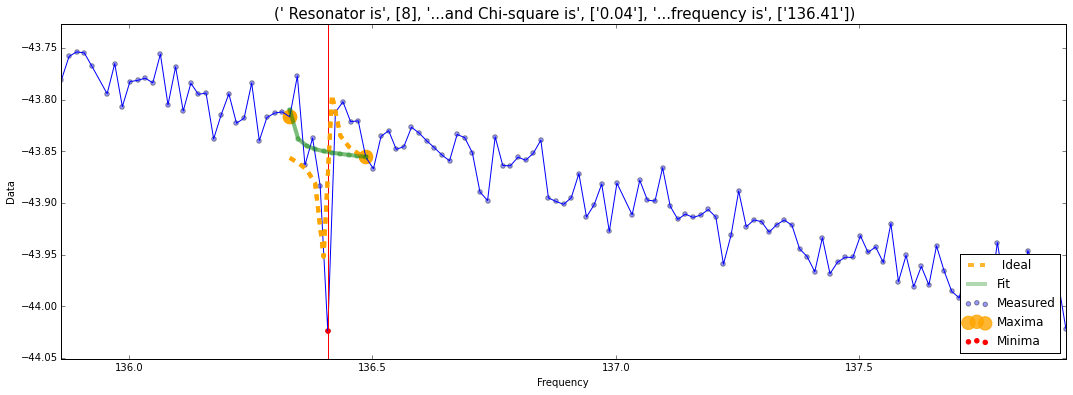

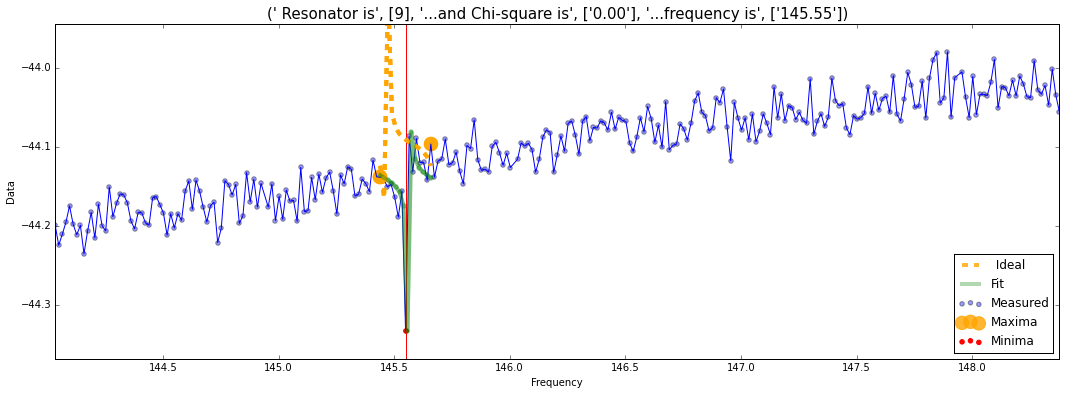

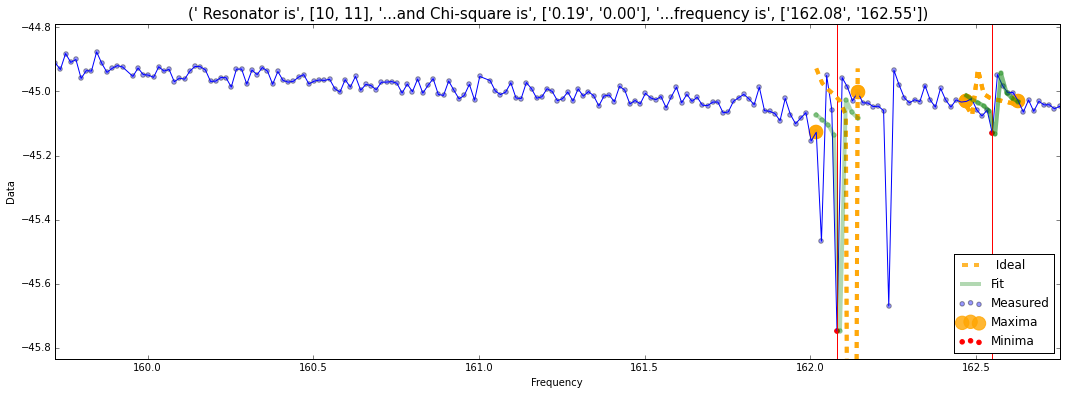

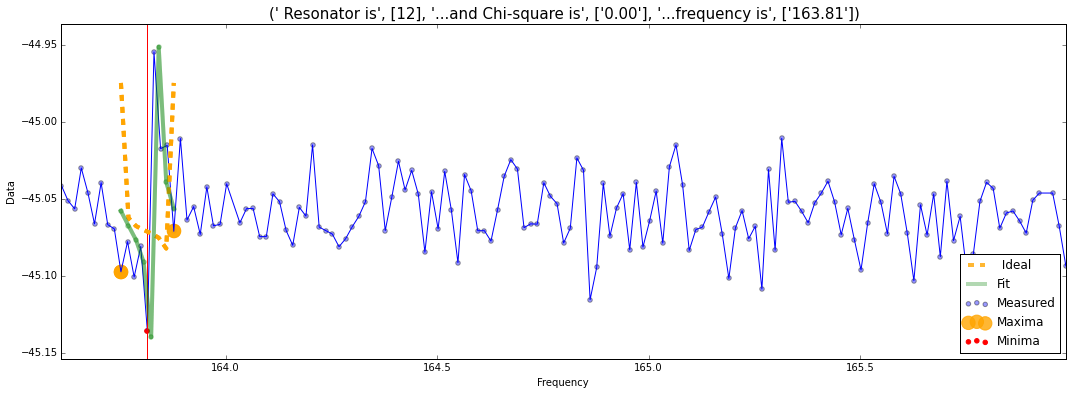

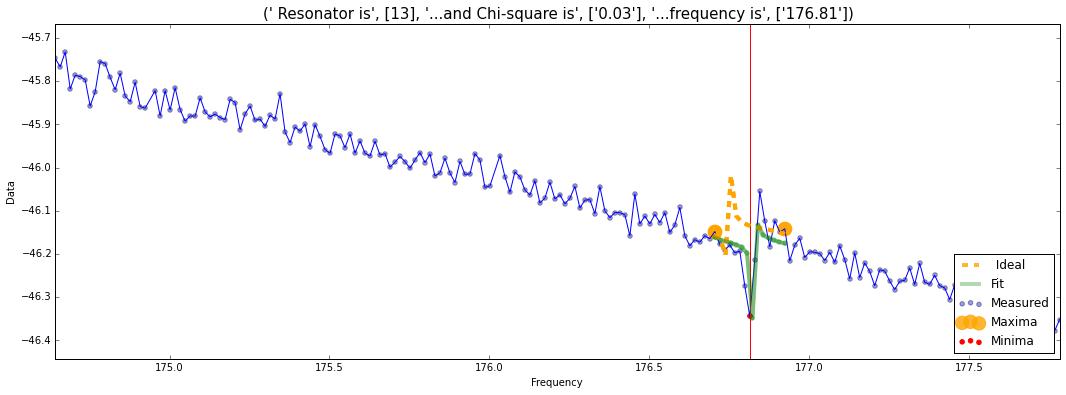

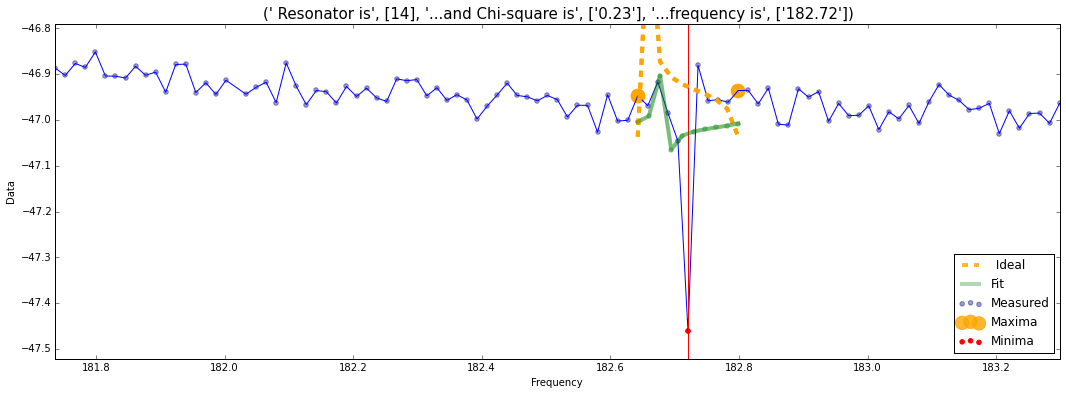

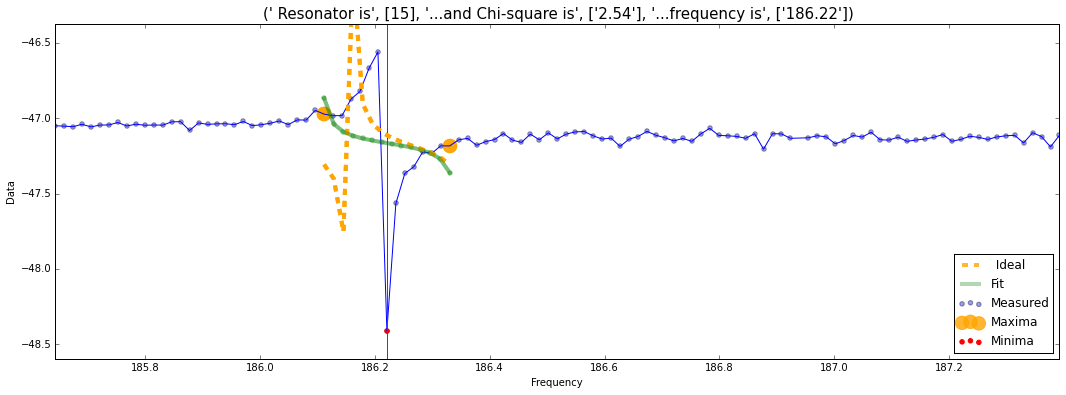

In [733]:
'''And now, you get the option to see the resonators close up, and their chi-squared to the Lorentz function'''
input_a = raw_input ( "Enter : \
1)See Resonance close up \
2)See Resonance close-up w/ Tangent only ( This is usually enough ) \
3)See Resonance close-up, and then see Resonance close-up with Tangent " 
                    )
if input_a == '1':
    drl.show_me_resonators_in_close_range(ranges_to_look, freq_to_look, data_to_look,\
                                          x, y, order_of_mins) 
    
elif input_a == '2':
    count_chi, count_chi_less_than_1, chi_squared_total, freq_points_total, \
    length_of_chi_squared_total = \
    drl.show_me_resonators_in_close_range_with_tangent(ranges_to_look, freq_to_look,\
                                                          data_to_look, x, y, move, \
                                                          noise, tol, tol2, flat,\
                                                          order_of_mins, locmins)
    
    drl.print_me_those_chi_square(count_chi, count_chi_less_than_1, \
                                  chi_squared_total, freq_points_total)

elif input_a == '3':
    drl.show_me_resonators_in_close_range(ranges_to_look, freq_to_look, data_to_look,\
                                          x, y, order_of_mins) 
    
    count_chi, count_chi_less_than_1, chi_squared_total, freq_points_total, \
    length_of_chi_squared_total = \
    drl.show_me_resonators_in_close_range_with_tangent(ranges_to_look, freq_to_look,\
                                                          data_to_look, x, y, move, \
                                                          noise, tol, tol2, flat,\
                                                          order_of_mins, locmins)
    
    drl.print_me_those_chi_square(count_chi, count_chi_less_than_1, \
                                  chi_squared_total, freq_points_total)
    
else :
    print "I'm sorry, I don't recognise that input. Please try again"